Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 07-May-2025

In [11]:
import pandas as pd
import numpy as np

In [116]:
# Set directory 
data_dir = r'Z:/Data/Roadrunner/GtACR_arena/'
save_name = 'control.csv'

In [113]:
# Load original dataframe
df = pd.read_csv(data_dir + 'control_orig.csv') 

# Populate new dataframe
df_new = pd.DataFrame()
 
s = df["SET"]
s = s.replace("set1", 1)
s = s.replace("set2", 2)
df_new["set"] = s.tolist()

s = df["INTENSITY"]
s = s.replace("int_1", 1)
s = s.replace("int_3", 3)
s = s.replace("int_5", 5)
s = s.replace("int_7", 7)
s = s.replace("int_9", 9)
df_new["intensity"] = s.tolist()

s = df["FLYID"]
s = s-s.min()+1
df_new["animal_id"] = s.tolist()

df_new["frame"] = df["frame"].tolist()
df_new["time"] = df["time"].tolist()
df_new["stimulus"] = df["LED"].tolist()
df_new["x"] = df["X#wcentroid (mm)"].tolist()
df_new["y"] = df["Y#wcentroid (mm)"].tolist()
df_new["forward_velocity"] = df["VFORWARD#wcentroid (mm/s)"].tolist()
df_new["lateral_velocity"] = df["VLATERAL#wcentroid (mm/s)"].tolist()
df_new["angular_velocity"] = df["VANGULAR#head (deg/s)"].tolist()
df_new["speed"] = df["SPEED#wcentroid (mm/s)"].tolist()

C:\Users\Chris\AppData\Local\Temp\ipykernel_47892\3627868548.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace("set2", 2)
C:\Users\Chris\AppData\Local\Temp\ipykernel_47892\3627868548.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace("int_9", 9)


In [114]:
# Update stimulus and rename
animal_ids = df_new.animal_id.unique().tolist()
for animal_id in animal_ids:
    stimulus = df_new.stimulus[df_new.animal_id==animal_id].to_numpy()
    stimulus_onset_indices = np.argwhere(np.diff(stimulus)>0)+1
    stimulus_offset_indices = np.argwhere(np.diff(stimulus)<0)
    
    n_presentation = 0
    for index, _ in enumerate(stimulus_onset_indices):
        stimulus[stimulus_onset_indices[index][0]:stimulus_offset_indices[index][0]] += n_presentation
        n_presentation += 1

    df_new.loc[df_new.index[df_new.animal_id==animal_id], "stimulus"] = stimulus

df_new = df_new.rename(columns={"stimulus": "n_stimulus"})

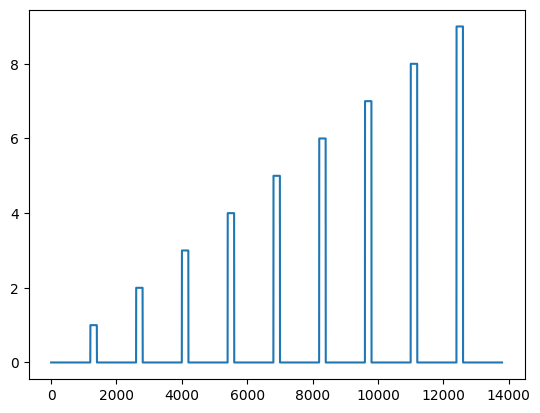

In [115]:
# Plot updated stimulus
import matplotlib.pyplot as plt

stimulus = df_new.n_stimulus[df_new.animal_id==animal_id].to_numpy()
plt.plot(stimulus)
plt.show()

In [117]:
# Save new dataframe
df_new.to_csv(data_dir + save_name, index=False)